## Christy's Individual Planning Report

### (1) Data Description of Datasets

In [5]:
library(tidyverse)
players<-read_csv('players.csv')|>
    summary()
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

### Players Summary
In the players.csv dataset, there are
* 196 observations
* 7 variables
* played_hours and possibly hashed_email is gathered through server data, and every other variable likely through registration/survey
  

##### Variables Summary
The 7 variables are 
1. experience
   * character variable with 5 categories: "Veteran", "Pro", "Amateur", "Regular", and "Beginning", indicating individuals' MineCraft experience level
<br><br>     
2. subscribe
   * logical variable (true or false) indicating player's subscription to a newsletter
   * there are many more subscribers (144) to non-subscribers (52)
<br><br>
3. hashedEmail
   * character variable that reports the player's censored email address
   * **potential issue:** undecipherable to reader
<br><br>
4. played_hours
    * a double variable reporting an individual's played hours of MineCraft
    * **mean played_hours: 5.84** 
<br><br>
5. name
   * character variable of player's name
<br><br>
6. gender
   * character variable representing the player's gender: "Male", "Female", "Agender", "Prefer not to say", "Non-binary","Other" and "Two-Spirited."
   * **potential issue:** must become factors
<br><br>
7. age
    * double variable reporting the individual's age in years
    * **potential issue:** NA values must be filtered out
    * **mean age: 21.14**

In [6]:
sessions<-read_csv('sessions.csv')|>
    summary()
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

### Sessions Summary
In the sessions.csv dataset, there are
* 1535 observations
* 5 variables
* all data came from the MineCraft server
  

##### Variables Summary
The 5 variables are 
1. hashed_email (repeat from players.csv)
   * character variable that reports the player's censored email address
<br><br>
2. start_time and end_time
    * both character variables
    * **potential issues**: not tidy data (characters), but understandable to reader
<br><br>
3. original_start_time and original_end_time
     * both double variables
     * **potential issues**: unintelligible to reader
    * **mean original_start_time: 1.719e+12**
    * **mean original_end_time: 1.719e+12**
    * **potential issue:** NA values present in original_end_time


### (2) Questions
**The broad question I will address is Question 1:**
  What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**The specific question I have formulated:** 
Can age and played_hours predict subscription status in players.csv?

**How's this data helpful?**
The players.csv data contains the explanatory variables (age and played_hours) to determine subscription status. 

**How I will wrangle this data:**
   * select played_hours, age, and subscribe (renamed to subscription_status)
        * more clear and concise
* tidying the data to remove any negative or N/A values


### (3) Exploratory Data Analysis and Visualization
  **Table of Means for Quantitative Variables in players.csv**
||played hours|age|
|---|-------|-----|
|mean|5.90|21.14|


In [7]:
players<-read_csv('players.csv')|>
        filter(Age!="NA")|>#removing NA values (tidying)
        rename(subscription_status=subscribe, # more understandable 
              age=Age) #consistency in capitals
players
mean_players<-players|>
            select(played_hours,age)|> #only quantitative values
           map_df(mean)

mean_players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscription_status,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


played_hours,age
<dbl>,<dbl>
5.904639,21.13918


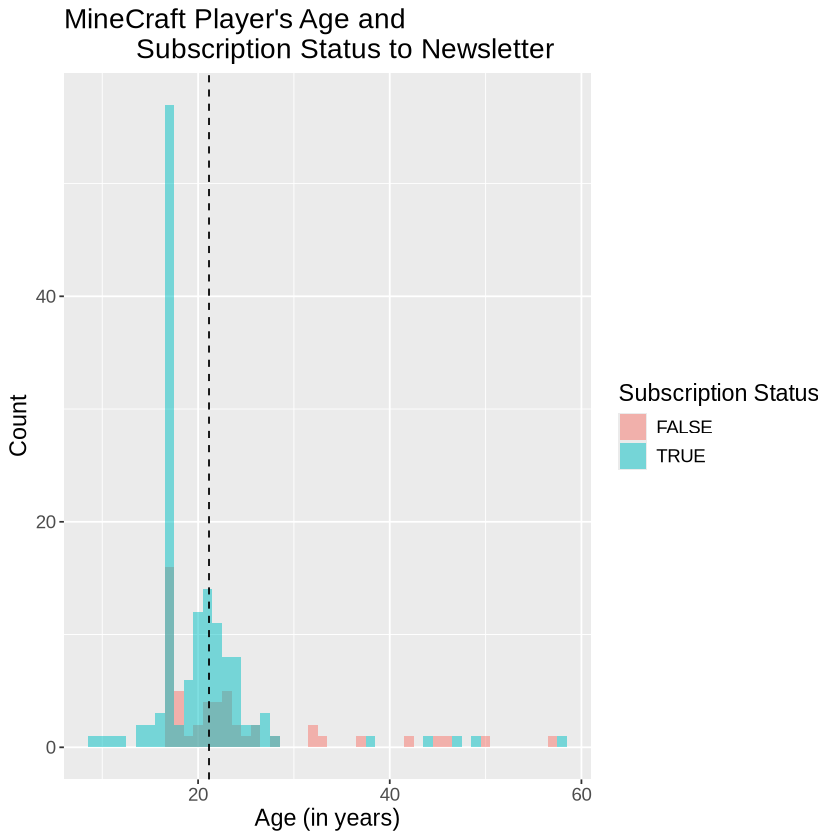

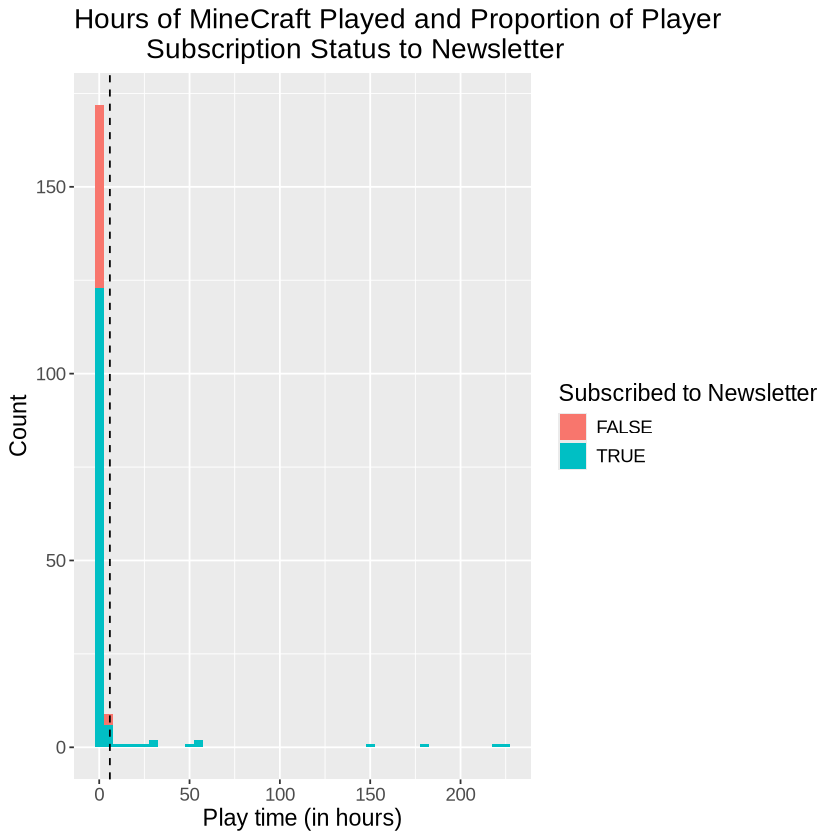

In [8]:
viz_1<-players|>
    ggplot(aes(x=age, fill= subscription_status))+
    geom_histogram(binwidth=1,alpha=0.5, position='identity')+
    geom_vline(xintercept = 21.14, linetype = "dashed")+
    labs(x="Age (in years)", 
         y= "Count",
         fill = "Subscription Status",
         title ="MineCraft Player's Age and
         Subscription Status to Newsletter")+ 
    theme(text = element_text(size = 14))
viz_1
viz_2<-players|>
    ggplot(aes(x= played_hours, fill=subscription_status))+
    geom_histogram(binwidth=5)+
    geom_vline(xintercept = 5.90, linetype = "dashed")+
    labs(x="Play time (in hours)",
         y="Count",
         fill = "Subscribed to Newsletter",
         title ="Hours of MineCraft Played and Proportion of Player
         Subscription Status to Newsletter")+
    theme(text = element_text(size = 14))
viz_2

### First Visualization (histogram)
Exploring the subscription status and age variables in viz_1
* Overwhemingly, most players are in the late teens to 20s
* Majority of players are subscribed to a newsletter as blue bins mostly dominate over the orange bins
    * especially for the players around their 20s
    * Older players (>30) have no strong pattern represented
* Dashed line represents mean age~21.14 
### Second Visualization (histogram)
Exploring the subscription status and played_hours variables in viz_2
* Majority of individual play <6 hours. This imbalance may tell us this variable is not a strong predictor later on as so many players log fewer hours
* Dashed line represents mean played hours~ 5.9
* Potential problems: extreme imbalance in data (outliers at >10 hours)
* Proportion of blue to orange show large majority are subscribed to a newsletter

### (4) Methods and Plan
**Question**: Can age and played_hours predict subscription status in players.csv?

**Why this dataset:** As it contains the explanatory and response variables I need (played_hours, age and subscription_status)

**Proposed method and reasoning**: Creating a k-NN classification model to address my question of interest using the players.csv dataset.
Why k-NN classification 
 * binary classification, only two classes (subscribed/not subscribed); k-NN classification directly predicts a class label
 * majority vote among k neighbors, no linear relationship has to be assumed. Seeing q3, there is no strong linear pattern
 * **assumptions required:**
     * Scaling, due to the imbalance in the variables
     * there will be enough neighbours  nearby (especially for the outliers)


**Potential Weaknesses/Limitations:**
- Inaccuracy due to k chosen (fewer neighbours for outliers)
- Outliers: imbalance is difficult for predictions, especially for outliers (ex. hours played on the higher end)

**How**: 
1. Wrangle the data (like q2)
2. Split data into Train/Test datasets (75/25)
3. Standardize predictors in each dataset
4. Use a seed for reproducibility, do 5 fold cross-validation to tune k in training set
5. Pick best k, refit on training set then use on testing dataset

### (5) Github Link
https://github.com/rockyrun23/DSCI-100-Individual-Planning-Stage-004-10.git